In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import ticker_data

In [2]:
df = pd.read_csv('data/ohlc/googl.csv', index_col=0, parse_dates=True)
df = df['close'].pct_change(fill_method=None).apply(lambda x: np.log(1 + x)).rename('log_diff')
df

date
2014-04-03 04:00:00         NaN
2014-04-04 04:00:00   -0.047020
2014-04-07 04:00:00   -0.008509
2014-04-08 04:00:00    0.030745
2014-04-09 04:00:00    0.016949
                         ...   
2020-12-24 05:00:00    0.003425
2020-12-28 05:00:00    0.022691
2020-12-29 05:00:00   -0.009174
2020-12-30 05:00:00   -0.012313
2020-12-31 05:00:00    0.009396
Name: log_diff, Length: 1700, dtype: float64

<AxesSubplot:xlabel='date'>

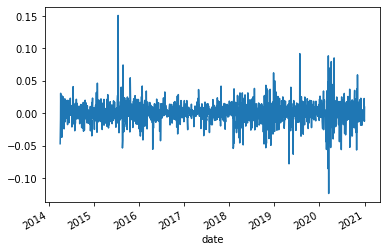

In [3]:
df.plot()

In [16]:
# mean_conf_func = lambda x: scipy.stats.t.interval(alpha=0.9, df=len(x)-1, loc=np.mean(x), scale=scipy.stats.sem(x))
mean_conf_func = lambda x: scipy.stats.norm.interval(alpha=0.9, loc=np.mean(x), scale=scipy.stats.sem(x))

funcs = {'mean': lambda x: x.mean(),
         'lower_bound': lambda x: mean_conf_func(x)[0],
         'upper_bound': lambda x: mean_conf_func(x)[1]
        }
res = df.resample('Q').agg(funcs)
index = res.index.get_level_values(1)
columns = list(funcs.keys())
data = dict([(c, res.loc[c]) for c in columns])
res = pd.DataFrame(data=data, index=index, columns=columns)

In [17]:
res

,mean,lower_bound,upper_bound
date,,,
2014-06-30,0.000380,NaN,NaN
2014-09-30,0.000100,-0.002201,0.002400
2014-12-31,-0.001614,-0.004312,0.001084
2015-03-31,0.000726,-0.002289,0.003742
2015-06-30,-0.000425,-0.002697,0.001846
...,...,...,...
2019-12-31,0.001444,-0.000471,0.003359
2020-03-31,-0.002292,-0.009557,0.004972
2020-06-30,0.003162,-0.001767,0.008090


<AxesSubplot:xlabel='date'>

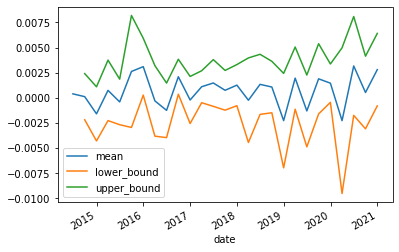

In [23]:
res.plot()